# Algorithmic Trading Bot

## Dependencies

  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218922 sha256=b8d26f95bf0b98ca0a3697001390adeb09d0219336b39d1d05e53cb908d8edf2
  Stored in directory: c:\users\satwik\appdata\local\pip\cache\wheels\1e\5c\47\759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas-ta


In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
from arch import arch_model
import pandas as pd
import pandas_ta
import os
import numpy as np

In [2]:
import yfinance as yf

C:\Users\SATWIK\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Loading Dataset

In [28]:
sheet = "1jwQ8o033kyTwp4EkXNCkVq_OhKtRwIAJAsEx4cRDYPM"
sheet_name = "NIFTY50"
url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet, sheet_name)

data = pd.read_csv(url)



In [29]:
data.sample(2)

,Date,Open,High,Low,Close
1520,"Jul 1, 2020","10,323.80","10,447.05","10,299.60","10,430.05"
1201,"Mar 12, 2019","11,231.35","11,320.40","11,227.00","11,301.20"


## Data Pre-processing
---
### Converting Date to DateTime format

### Helper Functions

Created helper functions to extract date values from the string given, and converting them into datetime structure that can be recognized by pandas for ease of use.

In [30]:
def toMonths(val):
    month = val[:3]
    
    if month=="Jan":
        return "01"
    elif month=="Feb":
        return "02"
    elif month=="Mar":
        return "03"
    elif month=="Apr":
        return "04"
    elif month=="May":
        return "05"
    elif month=="Jun":
        return "06"
    elif month=="Jul":
        return "07"
    elif month=="Aug":
        return "08"
    elif month=="Sep":
        return "09"
    elif month=="Oct":
        return "10"
    elif month=="Nov":
        return "11"
    else:
        return "12"
    
def toDay(val):
    day = val[4:6]
    
    if day=="1,":
        return 1
    elif day=="2,":
        return 2
    elif day=="3,":
        return 3
    elif day=="4,":
        return 4
    elif day=="5,":
        return 5
    elif day=="6,":
        return 6
    elif day=="7,":
        return 7
    elif day=="8,":
        return 8
    elif day=="9,":
        return 9
    else:
        return int(day)

def toYear(val):
    return int(val[-4:])
    
def toDateTime(val):
    date  = toDay(val)
    month = toMonths(val)
    year = toYear(val)
    
    return pd.to_datetime(f"{year}-{month}-{date}")


In [31]:
data["Date"] = data["Date"].map(toDateTime)

In [32]:
data = data.set_index("Date")

### Converting from String to Float 

Changed the data type of 'Close' column of the dataset to float for taking out its derivatives for feature processing.

In [33]:
data["Close"] = data["Close"].str.replace(",","")

In [34]:
data["Close"] = data["Close"].map(float)

## Saving Pre-Processed Dataset

In [9]:
#data.to_csv('nifty50.csv')

### Calculating Log Return

Daily return of commodity was calculated from it's daily close value. 

In [35]:
data["log_ret"] = np.log(data["Close"]).diff()

In [10]:
data.head(36)

,Open,High,Low,Close,log_ret
Date,,,,,
2014-03-18,"6,532.45","6,574.95","6,497.65",6516.65,NaN
2014-03-19,"6,530.00","6,541.20","6,506.00",6524.05,0.001135
2014-03-20,"6,508.35","6,523.65","6,473.25",6483.10,-0.006297
2014-03-21,"6,515.20","6,522.90","6,485.70",6493.20,0.001557
2014-03-24,"6,510.50","6,591.50","6,510.50",6583.50,0.013811
2014-03-25,"6,550.10","6,595.55","6,544.85",6589.75,0.000949
2014-03-26,"6,615.65","6,627.45","6,580.60",6601.40,0.001766
2014-03-27,"6,613.10","6,673.95","6,599.50",6641.75,0.006094
2014-03-28,"6,673.05","6,702.60","6,643.80",6695.90,0.008120


## Intraday Data

In [145]:
intraday= pd.read_csv('nifty50.csv')

In [146]:
intraday

,timestamp,open,high,low,close,dt,time
0,2015-01-09 09:15:00+05:30,8285.45,8295.90,8285.45,8292.10,2015-01-09,9.250
1,2015-01-09 09:16:00+05:30,8292.60,8293.60,8287.20,8288.15,2015-01-09,9.267
2,2015-01-09 09:17:00+05:30,8287.40,8293.90,8287.40,8293.90,2015-01-09,9.283
3,2015-01-09 09:18:00+05:30,8294.25,8300.65,8293.90,8300.65,2015-01-09,9.300
4,2015-01-09 09:19:00+05:30,8300.60,8301.30,8298.75,8301.20,2015-01-09,9.317
...,...,...,...,...,...,...,...
663016,2022-03-11 15:25:00+05:30,16624.50,16624.65,16620.95,16621.45,2022-03-11,15.417
663017,2022-03-11 15:26:00+05:30,16621.35,16626.40,16620.10,16624.55,2022-03-11,15.433
663018,2022-03-11 15:27:00+05:30,16623.95,16627.15,16622.95,16626.80,2022-03-11,15.450
663019,2022-03-11 15:28:00+05:30,16626.30,16626.95,16622.55,16623.15,2022-03-11,15.467


In [148]:
intraday.dtypes

timestamp     object
open         float64
high         float64
low          float64
close        float64
dt            object
time         float64
dtype: object

In [38]:
intraday.reset_index(inplace=True) 

In [16]:
intraday.head(17)

,index,Date,Open,High,Low,Close,Adj Close,Volume


In [13]:
intraday["Datetime"] = pd.to_datetime(intraday["Datetime"])

KeyError: 'Datetime'

In [55]:
intraday.sample(49)

,Datetime,Open,High,Low,Close,Adj Close,Volume
50,2024-02-22 13:25:00+05:30,21963.349609,21971.750000,21959.800781,21965.150391,21965.150391,0
60,2024-02-22 14:15:00+05:30,22054.750000,22079.099609,22045.550781,22051.199219,22051.199219,0
32,2024-02-22 11:55:00+05:30,21948.800781,21967.500000,21947.150391,21962.250000,21962.250000,0
39,2024-02-22 12:30:00+05:30,21957.900391,21965.199219,21946.400391,21959.599609,21959.599609,0
46,2024-02-22 13:05:00+05:30,21952.949219,21968.500000,21943.449219,21968.000000,21968.000000,0
37,2024-02-22 12:20:00+05:30,21969.849609,21972.000000,21942.400391,21951.750000,21951.750000,0
43,2024-02-22 12:50:00+05:30,21963.849609,21965.750000,21942.949219,21942.949219,21942.949219,0
23,2024-02-22 11:10:00+05:30,21928.650391,21935.400391,21923.599609,21927.050781,21927.050781,0
44,2024-02-22 12:55:00+05:30,21944.699219,21960.050781,21940.300781,21959.800781,21959.800781,0
71,2024-02-22 15:10:00+05:30,22205.099609,22233.349609,22201.300781,22206.699219,22206.699219,0


In [57]:
intraday.head(17)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-02-22 09:15:00+05:30,22081.550781,22087.000000,22018.099609,22047.250000,22047.250000,0
2024-02-22 09:20:00+05:30,22047.099609,22059.150391,22031.900391,22038.550781,22038.550781,0
2024-02-22 09:25:00+05:30,22041.349609,22047.699219,21998.849609,22006.449219,22006.449219,0
2024-02-22 09:30:00+05:30,22006.750000,22014.000000,21968.750000,21970.349609,21970.349609,0
2024-02-22 09:35:00+05:30,21969.250000,22001.650391,21965.750000,21992.250000,21992.250000,0
2024-02-22 09:40:00+05:30,21990.900391,22061.900391,21984.949219,22047.150391,22047.150391,0
2024-02-22 09:45:00+05:30,22044.849609,22067.900391,22041.050781,22055.550781,22055.550781,0
2024-02-22 09:50:00+05:30,22055.150391,22058.050781,21998.349609,22010.650391,22010.650391,0
2024-02-22 09:55:00+05:30,22008.800781,22023.849609,21947.650391,21948.750000,21948.750000,0


In [39]:
intraday["date"] = intraday["Datetime"].dt.date

In [40]:
intraday.set_index("Datetime", inplace=True)

In [49]:
#intraday.to_csv('intraday.csv')

In [62]:
intraday.head()

,Open,High,Low,Close,Adj Close,Volume,date
Datetime,,,,,,,
2024-02-22 09:15:00+05:30,22081.550781,22087.000000,22018.099609,22047.250000,22047.250000,0,2024-02-22
2024-02-22 09:20:00+05:30,22047.099609,22059.150391,22031.900391,22038.550781,22038.550781,0,2024-02-22
2024-02-22 09:25:00+05:30,22041.349609,22047.699219,21998.849609,22006.449219,22006.449219,0,2024-02-22
2024-02-22 09:30:00+05:30,22006.750000,22014.000000,21968.750000,21970.349609,21970.349609,0,2024-02-22
2024-02-22 09:35:00+05:30,21969.250000,22001.650391,21965.750000,21992.250000,21992.250000,0,2024-02-22


## Feature Engineering

### Variance

A rolling variance of 180 days window was calculated for the data set.

<AxesSubplot:xlabel='Date'>

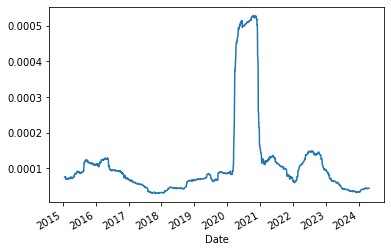

In [41]:
data["variance"] = data["log_ret"].rolling(180).var()

data["variance"].plot()

In [17]:
data[179:187]

,Open,High,Low,Close,log_ret,variance
Date,,,,,,
2014-12-15,"8,160.75","8,242.40","8,152.50",8219.6,-0.000547,NaN
2014-12-16,"8,172.60","8,189.35","8,052.60",8067.6,-0.018666,0.000065
2014-12-17,"8,041.20","8,082.00","7,961.35",8029.8,-0.004696,0.000065
2014-12-18,"8,138.90","8,174.30","8,084.90",8159.3,0.015999,0.000066
2014-12-19,"8,230.45","8,263.45","8,208.60",8225.2,0.008044,0.000066
2014-12-22,"8,255.00","8,330.95","8,228.20",8324.0,0.011940,0.000066
2014-12-23,"8,324.60","8,364.75","8,252.85",8267.0,-0.006871,0.000066
2014-12-24,"8,272.05","8,286.40","8,155.25",8174.1,-0.011301,0.000067


In [42]:
data = data["2016-01-01":]

### Predicted Variance

Variance was predicted using Generalized Auto Regressive Conditional Heteroskedastic (GARCH) model.

In [43]:
def predict_volatility(x):
    model = arch_model(y=x, p=1, q=3).fit(update_freq=5, disp="off")
    
    variance_forecast = model.forecast(horizon=1).variance.iloc[-1,0]
    
    
    
    return variance_forecast


In [46]:
data["pred"] = data["log_ret"].rolling(180).apply(lambda x: predict_volatility(x))

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.229e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.32e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.51e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.559e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.908e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.326e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.991e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.991e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.536e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.65e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.092e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.093e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.778e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.776e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.46e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.463e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.409e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.355e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.579e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.603e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.54e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.421e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.249e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.272e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.152e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.105e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.092e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.088e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.244e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.223e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.181e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.192e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.873e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.94e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.683e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.684e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.43e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.445e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.392e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.394e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.388e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.415e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.501e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.582e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.278e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.257e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.514e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.513e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.802e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.798e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.029e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.011e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.053e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.023e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.214e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.212e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.374e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.362e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.807e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.778e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.612e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.604e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.744e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.706e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.89e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.985e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.58e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.566e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.61e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.626e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.26e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.3e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Data

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003396. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000364. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004656. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004662. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005097. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00051. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Dat

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005017. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005021. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005068. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005076. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005125. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005125. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005259. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005256. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004086. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003889. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00014. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001386. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Dat

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001106. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001109. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001222. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001246. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001324. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001326. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001308. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001308. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001159. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001159. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001044. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001041. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.89e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.886e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.092e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.094e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.256e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 7.471e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.469e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.475e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.858e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.894e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001117. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001134. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001356. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001362. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000147. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001466. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001477. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001475. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000141. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001412. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000145. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001449. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001015. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001015. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.996e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.951e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.715e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.73e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.428e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.425e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.066e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.04e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: Da

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.315e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.298e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.369e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.242e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.194e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.229e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.045e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.057e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.514e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.467e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.309e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.309e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.311e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.336e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.067e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.087e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.322e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.317e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.314e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.382e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\SATWIK\anaconda3\lib\site-packages\arch\univariate\base.py:311: D

In [47]:
data.sample(18)

,Open,High,Low,Close,log_ret,variance,pred
Date,,,,,,,
2022-05-06,"16,415.55","16,484.20","16,340.90",16411.25,-0.016402,0.000124,0.000156
2021-05-19,"15,058.60","15,133.40","15,008.85",15030.15,-0.005173,0.000135,0.000130
2021-04-26,"14,449.45","14,557.50","14,421.30",14485.00,0.009967,0.000131,0.000182
2017-03-20,"9,166.95","9,167.60","9,116.30",9126.85,-0.003631,0.000058,0.000046
2017-11-07,"10,477.15","10,485.75","10,340.80",10350.15,-0.009773,0.000031,0.000032
2023-12-11,"20,965.30","21,026.10","20,923.70",20997.10,0.001320,0.000033,0.000026
2016-02-22,"7,208.85","7,252.40","7,200.70",7234.55,0.003295,0.000115,NaN
2021-11-08,"18,040.20","18,087.80","17,836.10",18068.55,0.008434,0.000082,0.000066
2018-01-04,"10,469.40","10,513.00","10,441.45",10504.80,0.005881,0.000032,0.000030


In [48]:
#data.to_csv('data.csv')

<AxesSubplot:>

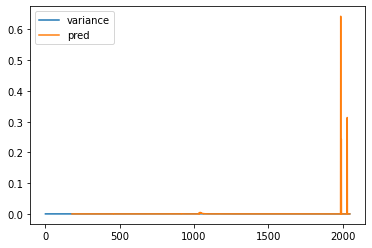

In [40]:
data[["variance", "pred"]].plot()

In [41]:
data[["variance","pred"]]["2024-01-01":].plot()

TypeError: cannot do slice indexing on RangeIndex with these indexers [2024-01-01] of type str

### Prediction Premium

Daily predicted premium or discount of the stock was calculated for the stock. This column acts as threshold value to detect the next day trend of the commodity.

In [2]:
data = pd.read_csv('data.csv')

In [110]:
data["pred_premium"] = (data["pred"]-data["variance"])/data["variance"]

In [111]:
data.sample(15)

,Date,Open,High,Low,Close,log_ret,variance,pred,pred_premium
635,2018-07-25,"11,148.40","11,157.15","11,113.25",11132.00,-0.000207,0.000045,0.000031,-0.297662
496,2018-01-03,"10,482.65","10,503.60","10,429.55",10443.20,0.000096,0.000032,0.000032,-0.028123
1026,2020-02-28,"11,382.00","11,384.80","11,175.05",11201.75,-0.037802,0.000092,0.000359,2.905772
1288,2021-03-19,"14,471.15","14,788.25","14,350.10",14744.00,0.012706,0.000120,0.000123,0.018744
1394,2021-08-25,"16,654.00","16,712.45","16,617.50",16634.65,0.000604,0.000105,0.000041,-0.610475
1255,2021-02-01,"13,758.60","14,336.35","13,661.75",14281.20,0.046333,0.000127,0.000224,0.761684
1729,2022-12-30,"18,259.10","18,265.25","18,080.30",18105.30,-0.004722,0.000096,0.000062,-0.352296
191,2016-10-13,"8,671.50","8,681.55","8,541.35",8573.35,-0.015675,0.000090,0.000077,-0.140494
1107,2020-07-01,"10,323.80","10,447.05","10,299.60",10430.05,0.012343,0.000499,0.000175,-0.650274
847,2019-06-11,"11,959.85","12,000.35","11,904.35",11965.60,0.003592,0.000084,0.000076,-0.100515


<AxesSubplot:>

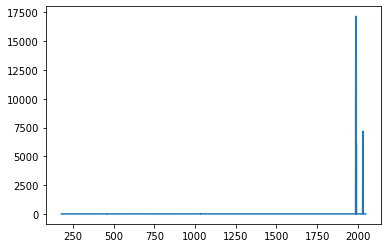

In [112]:
data["pred_premium"].plot()

In [113]:
data["premium_std"] = data["pred_premium"].rolling(180).std()

In [114]:
data.sample(16)

,Date,Open,High,Low,Close,log_ret,variance,pred,pred_premium,premium_std
1250,2021-01-22,"14,583.40","14,619.90","14,357.75",14371.90,-0.015085,0.000117,0.000115,-0.015194,0.271060
1452,2021-11-18,"17,890.55","17,945.60","17,688.50",17764.80,-0.007506,0.000078,0.000063,-0.197274,0.311983
1472,2021-12-17,"17,276.00","17,298.15","16,966.45",16985.20,-0.015377,0.000073,0.000105,0.442754,0.432709
1926,2023-10-19,"19,545.20","19,681.80","19,512.35",19624.70,-0.002362,0.000036,0.000033,-0.098604,0.170376
1721,2022-12-20,"18,340.30","18,404.90","18,202.65",18385.30,-0.001910,0.000097,0.000051,-0.471544,0.310408
851,2019-06-17,"11,844.00","11,844.05","11,657.75",11672.15,-0.012866,0.000083,0.000091,0.097274,0.658736
1084,2020-05-29,"9,422.20","9,598.85","9,376.90",9580.30,0.009460,0.000507,0.000348,-0.314608,2.730195
1129,2020-07-31,"11,139.50","11,150.40","11,026.65",11073.45,-0.002588,0.000506,0.000119,-0.765860,2.757503
329,2017-05-05,"9,374.55","9,377.10","9,272.00",9285.30,-0.008002,0.000056,0.000044,-0.211679,NaN
746,2019-01-10,"10,859.35","10,859.35","10,801.80",10821.60,-0.003095,0.000067,0.000048,-0.287822,0.583756


<AxesSubplot:>

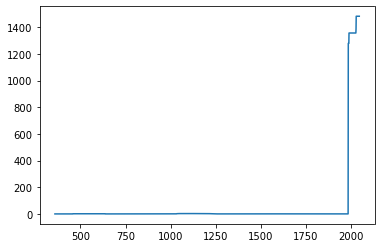

In [115]:
data["premium_std"].plot()

## Daily Signal

The following algorithm was devised to predict the daily trend of the stock.
<ul>
    <li>1 signifies an uptrend</li>
    <li>-1 signifies a downtrend</li>
</ul>

In [116]:
data["signal_daily"] = data.apply(lambda x: 1 if (x["pred_premium"]>x["premium_std"]*1.5)
                                 else ( -1 if (x["pred_premium"]<x["premium_std"]*-1.5) else np.nan), axis=1)

In [117]:
data.sample(20)

,Date,Open,High,Low,Close,log_ret,variance,pred,pred_premium,premium_std,signal_daily
1725,2022-12-26,"17,830.40","18,084.10","17,774.25",18014.60,0.011602,0.000097,0.000087,-0.095984,0.298335,NaN
864,2019-07-04,"11,928.80","11,969.25","11,923.65",11946.75,0.002514,0.000073,0.000054,-0.260345,0.575742,NaN
169,2016-09-08,"8,915.50","8,960.35","8,896.00",8952.50,0.003867,0.000093,NaN,NaN,NaN,NaN
1180,2020-10-13,"11,934.65","11,988.20","11,888.90",11934.50,0.000298,0.000526,0.000099,-0.811262,2.815919,NaN
1668,2022-09-30,"16,798.05","17,187.10","16,747.70",17094.35,0.016292,0.000142,0.000141,-0.006125,0.566336,NaN
1302,2021-04-12,"14,644.65","14,652.50","14,248.70",14310.80,-0.035965,0.000132,0.000146,0.108058,0.403897,NaN
1736,2023-01-10,"18,121.30","18,127.60","17,856.00",17914.15,-0.010387,0.000093,0.000083,-0.114762,0.279623,NaN
1858,2023-07-12,"19,497.45","19,507.70","19,361.75",19384.30,-0.002838,0.000042,0.000039,-0.069113,0.214058,NaN
791,2019-03-15,"11,376.85","11,487.00","11,370.80",11426.85,0.007343,0.000071,0.000053,-0.254643,0.607631,NaN
534,2018-02-28,"10,488.95","10,535.50","10,461.55",10492.85,-0.005839,0.000039,0.000040,0.036729,1.332083,NaN


In [118]:
data.tail(20)

,Date,Open,High,Low,Close,log_ret,variance,pred,pred_premium,premium_std,signal_daily
2029,2024-03-21,"21,989.90","22,080.95","21,941.30",22011.95,0.007884,0.000046,0.000047,0.022773,1357.071198,NaN
2030,2024-03-22,"21,932.20","22,180.70","21,883.30",22096.75,0.003845,0.000044,0.174017,3980.688076,1387.050634,1.0
2031,2024-03-26,"21,947.90","22,073.20","21,947.55",22004.70,-0.004174,0.000044,0.313530,7185.677274,1482.760976,1.0
2032,2024-03-27,"22,053.95","22,193.60","22,052.85",22123.65,0.005391,0.000044,0.000045,0.018502,1482.760962,NaN
2033,2024-03-28,"22,163.60","22,516.00","22,163.60",22326.90,0.009145,0.000044,0.000045,0.024847,1482.760939,NaN
2034,2024-04-01,"22,455.00","22,529.95","22,427.75",22462.00,0.006033,0.000044,0.000054,0.231719,1482.760706,NaN
2035,2024-04-02,"22,458.80","22,497.60","22,388.15",22453.30,-0.000387,0.000044,0.000043,-0.005044,1482.760820,NaN
2036,2024-04-03,"22,385.70","22,521.10","22,346.50",22434.65,-0.000831,0.000044,0.000043,-0.007605,1482.760726,NaN
2037,2024-04-04,"22,592.10","22,619.00","22,303.80",22514.65,0.003560,0.000044,0.000043,-0.012235,1482.760658,NaN
2038,2024-04-05,"22,486.40","22,537.60","22,427.60",22513.70,-0.000042,0.000044,0.000043,-0.017443,1482.760621,NaN


In [119]:
data.sample(20)

,Date,Open,High,Low,Close,log_ret,variance,pred,pred_premium,premium_std,signal_daily
1727,2022-12-28,"18,084.75","18,173.10","18,068.35",18122.50,-0.000541,0.000096,0.000078,-0.189469,0.294828,NaN
234,2016-12-15,"8,128.40","8,225.90","8,121.95",8153.60,-0.003532,0.000072,0.000073,0.013860,NaN,NaN
119,2016-06-27,"8,039.35","8,120.65","8,039.35",8094.70,0.000754,0.000096,NaN,NaN,NaN,NaN
1108,2020-07-02,"10,493.05","10,598.20","10,485.55",10551.70,0.011596,0.000500,0.000165,-0.669701,2.729973,NaN
1218,2020-12-08,"13,393.85","13,435.45","13,311.05",13392.95,0.002781,0.000391,0.000081,-0.793874,2.010427,NaN
207,2016-11-07,"8,535.75","8,535.85","8,481.45",8497.05,0.007478,0.000082,0.000079,-0.031848,NaN,NaN
224,2016-12-01,"8,244.00","8,250.80","8,185.05",8192.90,-0.003850,0.000071,0.000074,0.044530,NaN,NaN
1151,2020-09-01,"11,464.30","11,553.55","11,366.90",11470.25,0.007240,0.000514,0.000173,-0.663735,2.784910,NaN
152,2016-08-12,"8,605.45","8,684.30","8,604.45",8672.15,0.009268,0.000094,NaN,NaN,NaN,NaN
587,2018-05-18,"10,671.85","10,674.95","10,589.10",10596.40,-0.008111,0.000045,0.000044,-0.005822,1.314399,NaN


In [120]:
data[data["signal_daily"]==1]

,Date,Open,High,Low,Close,log_ret,variance,pred,pred_premium,premium_std,signal_daily
426,2017-09-22,"10,094.35","10,095.05","9,952.80",9964.40,-0.015683,0.000031,0.000043,0.358646,0.180207,1.0
429,2017-09-27,"9,920.60","9,921.05","9,714.40",9735.75,-0.013847,0.000033,0.000051,0.545281,0.189849,1.0
458,2017-11-09,"10,358.65","10,368.45","10,266.95",10308.95,0.000563,0.000031,0.000567,17.533510,1.335412,1.0
667,2018-09-11,"11,476.85","11,479.40","11,274.00",11287.50,-0.013254,0.000044,0.000060,0.352918,0.194576,1.0
669,2018-09-14,"11,443.50","11,523.25","11,430.55",11515.20,0.012698,0.000045,0.000075,0.654595,0.200689,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1967,2023-12-20,"21,543.50","21,593.00","21,087.35",21150.15,-0.014222,0.000034,0.000068,0.973652,0.355588,1.0
1987,2024-01-18,"21,414.20","21,539.40","21,285.55",21462.25,-0.005098,0.000037,0.642849,17165.064149,1279.413543,1.0
1991,2024-01-25,"21,454.60","21,459.00","21,247.05",21352.60,-0.004735,0.000039,0.243441,6167.680428,1357.079016,1.0
2030,2024-03-22,"21,932.20","22,180.70","21,883.30",22096.75,0.003845,0.000044,0.174017,3980.688076,1387.050634,1.0


In [121]:
data[data["signal_daily"]==-1]

,Date,Open,High,Low,Close,log_ret,variance,pred,pred_premium,premium_std,signal_daily
358,2017-06-15,"9,617.90","9,621.40","9,560.80",9578.05,-0.004178,0.000052,0.000028,-0.461586,0.162881,-1.0
359,2017-06-16,"9,595.45","9,615.85","9,565.50",9588.05,0.001044,0.000052,0.000025,-0.522157,0.164720,-1.0
360,2017-06-19,"9,626.40","9,673.30","9,614.90",9657.55,0.007222,0.000051,0.000028,-0.451851,0.166084,-1.0
361,2017-06-20,"9,670.50","9,676.50","9,643.75",9653.50,-0.000419,0.000051,0.000025,-0.513650,0.167871,-1.0
362,2017-06-21,"9,648.10","9,650.45","9,608.60",9633.60,-0.002064,0.000051,0.000025,-0.517507,0.168567,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
1841,2023-06-15,"18,774.45","18,794.10","18,669.05",18688.10,-0.003621,0.000050,0.000034,-0.316586,0.202827,-1.0
1844,2023-06-20,"18,752.35","18,839.70","18,660.65",18816.70,0.003260,0.000047,0.000032,-0.311422,0.201502,-1.0
1845,2023-06-21,"18,849.40","18,875.90","18,794.85",18856.85,0.002131,0.000047,0.000032,-0.323392,0.201543,-1.0
1848,2023-06-26,"18,682.35","18,722.05","18,646.70",18691.20,0.001376,0.000045,0.000031,-0.325616,0.200484,-1.0


## Distribution of Daily Signal

Distribution of Uptrend and Downtrend is plotted. 

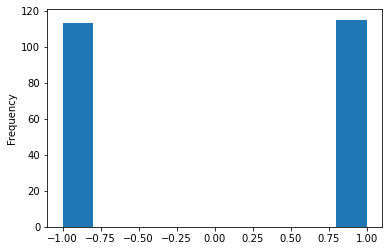

In [122]:
data["signal_daily"].plot(kind="hist")

plt.show()

The plot shows an even distribution of uptrend days and downtrend days of the commodity. This means that our model conforms with the market behavior.

In [18]:
#data.to_csv('daily_signal.csv')

## Intraday Strategy

Intraday strategy was transformed to Pythonic code.

In [3]:
data = pd.read_csv('daily_signal.csv')
intraday = pd.read_csv('nifty50.csv')

In [4]:
data.sample(23)
data.set_index('Date')
data[data['signal_daily']==1].shape

(115, 12)

In [5]:
data['signal_daily'] = data['signal_daily'].shift()

In [6]:
data[['Date','signal_daily']].sample(23)

,Date,signal_daily
753,2019-01-21,NaN
1012,2020-02-07,NaN
1557,2022-04-22,NaN
1162,2020-09-16,NaN
1898,2023-09-07,NaN
31,2016-02-16,NaN
1048,2020-04-01,1.0
1312,2021-04-28,NaN
194,2016-10-18,NaN
988,2020-01-07,NaN


In [128]:
data.dtypes

Date             object
Open             object
High             object
Low              object
Close           float64
log_ret         float64
variance        float64
pred            float64
pred_premium    float64
premium_std     float64
signal_daily    float64
dtype: object

In [129]:
data[data['signal_daily']==1].shape

(115, 11)

In [234]:
intraday.dtypes

timestamp     object
open         float64
high         float64
low          float64
close        float64
dt            object
time         float64
dtype: object

In [91]:
#data['Date'] = data['Date'].astype('|S')
#intraday['date'] = intraday['date'].astype('|S')

In [144]:
data.head(11)

,Date,Open,High,Low,Close,log_ret,variance,pred,pred_premium,premium_std,signal_daily
0,2016-01-01,"7,938.45","7,972.55","7,909.80",7963.20,0.002118,0.000109,NaN,NaN,NaN,NaN
1,2016-01-04,"7,924.55","7,937.55","7,781.10",7791.30,-0.021823,0.000111,NaN,NaN,NaN,NaN
2,2016-01-05,"7,828.40","7,831.20","7,763.25",7784.65,-0.000854,0.000111,NaN,NaN,NaN,NaN
3,2016-01-06,"7,788.05","7,800.95","7,721.20",7741.00,-0.005623,0.000111,NaN,NaN,NaN,NaN
4,2016-01-07,"7,673.35","7,674.95","7,556.60",7568.30,-0.022562,0.000113,NaN,NaN,NaN,NaN
5,2016-01-08,"7,611.65","7,634.10","7,581.05",7601.35,0.004357,0.000111,NaN,NaN,NaN,NaN
6,2016-01-11,"7,527.45","7,605.10","7,494.35",7563.85,-0.004946,0.000111,NaN,NaN,NaN,NaN
7,2016-01-12,"7,587.20","7,588.30","7,487.80",7510.30,-0.007105,0.000111,NaN,NaN,NaN,NaN
8,2016-01-13,"7,557.90","7,590.95","7,425.80",7562.40,0.006913,0.000111,NaN,NaN,NaN,NaN
9,2016-01-14,"7,467.40","7,604.80","7,443.80",7536.80,-0.003391,0.000111,NaN,NaN,NaN,NaN


In [132]:
data[data['signal_daily']==1].shape

(115, 11)

In [143]:
data[['Date', 'signal_daily']][data['signal_daily']==-1]

,Date,signal_daily
359,2017-06-16,-1.0
360,2017-06-19,-1.0
361,2017-06-20,-1.0
362,2017-06-21,-1.0
363,2017-06-22,-1.0
...,...,...
1842,2023-06-16,-1.0
1845,2023-06-21,-1.0
1846,2023-06-22,-1.0
1849,2023-06-27,-1.0


In [235]:
intraday.head(5)

,timestamp,open,high,low,close,dt,time
0,2015-01-09 09:15:00+05:30,8285.45,8295.90,8285.45,8292.10,2015-01-09,9.250
1,2015-01-09 09:16:00+05:30,8292.60,8293.60,8287.20,8288.15,2015-01-09,9.267
2,2015-01-09 09:17:00+05:30,8287.40,8293.90,8287.40,8293.90,2015-01-09,9.283
3,2015-01-09 09:18:00+05:30,8294.25,8300.65,8293.90,8300.65,2015-01-09,9.300
4,2015-01-09 09:19:00+05:30,8300.60,8301.30,8298.75,8301.20,2015-01-09,9.317


In [7]:
final_df = intraday.reset_index().merge(data[['Date','signal_daily']].reset_index(),left_on='dt',right_on='Date').set_index('timestamp')

In [8]:
final_df[final_df['signal_daily']==1].shape

(35607, 10)

In [153]:
final_df.tail(5)

,index_x,open,high,low,close,dt,time,index_y,Date,signal_daily
timestamp,,,,,,,,,,
2022-03-11 15:25:00+05:30,663016,16624.50,16624.65,16620.95,16621.45,2022-03-11,15.417,1530,2022-03-11,1.0
2022-03-11 15:26:00+05:30,663017,16621.35,16626.40,16620.10,16624.55,2022-03-11,15.433,1530,2022-03-11,1.0
2022-03-11 15:27:00+05:30,663018,16623.95,16627.15,16622.95,16626.80,2022-03-11,15.450,1530,2022-03-11,1.0
2022-03-11 15:28:00+05:30,663019,16626.30,16626.95,16622.55,16623.15,2022-03-11,15.467,1530,2022-03-11,1.0
2022-03-11 15:29:00+05:30,663020,16623.65,16627.70,16620.05,16620.50,2022-03-11,15.483,1530,2022-03-11,1.0


In [9]:
final_df = final_df.drop(['dt', 'Date'], axis=1)

In [10]:
final_df

,index_x,open,high,low,close,time,index_y,signal_daily
timestamp,,,,,,,,
2016-01-01 09:15:00+05:30,89974,7938.45,7939.25,7927.35,7927.95,9.250,0,NaN
2016-01-01 09:16:00+05:30,89975,7928.65,7929.65,7926.40,7926.45,9.267,0,NaN
2016-01-01 09:17:00+05:30,89976,7926.65,7927.70,7922.95,7923.05,9.283,0,NaN
2016-01-01 09:18:00+05:30,89977,7923.20,7927.20,7923.20,7926.35,9.300,0,NaN
2016-01-01 09:19:00+05:30,89978,7927.00,7927.50,7925.00,7925.05,9.317,0,NaN
...,...,...,...,...,...,...,...,...
2022-03-11 15:25:00+05:30,663016,16624.50,16624.65,16620.95,16621.45,15.417,1530,1.0
2022-03-11 15:26:00+05:30,663017,16621.35,16626.40,16620.10,16624.55,15.433,1530,1.0
2022-03-11 15:27:00+05:30,663018,16623.95,16627.15,16622.95,16626.80,15.450,1530,1.0


## Caluclating Technical Indicators

### RSI

In [11]:
final_df['rsi'] = pandas_ta.rsi(close=final_df['close'], length=20)

### Bolinger Bands

In [12]:
final_df['lband'] = pandas_ta.bbands(close=final_df['close'], length=20).iloc[:,0]
final_df['uband'] = pandas_ta.bbands(close=final_df['close'], length=20).iloc[:,2]

In [13]:
final_df

,index_x,open,high,low,close,time,index_y,signal_daily,rsi,lband,uband
timestamp,,,,,,,,,,,
2016-01-01 09:15:00+05:30,89974,7938.45,7939.25,7927.35,7927.95,9.250,0,NaN,NaN,NaN,NaN
2016-01-01 09:16:00+05:30,89975,7928.65,7929.65,7926.40,7926.45,9.267,0,NaN,NaN,NaN,NaN
2016-01-01 09:17:00+05:30,89976,7926.65,7927.70,7922.95,7923.05,9.283,0,NaN,NaN,NaN,NaN
2016-01-01 09:18:00+05:30,89977,7923.20,7927.20,7923.20,7926.35,9.300,0,NaN,NaN,NaN,NaN
2016-01-01 09:19:00+05:30,89978,7927.00,7927.50,7925.00,7925.05,9.317,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-11 15:25:00+05:30,663016,16624.50,16624.65,16620.95,16621.45,15.417,1530,1.0,45.562048,16620.988348,16641.896652
2022-03-11 15:26:00+05:30,663017,16621.35,16626.40,16620.10,16624.55,15.433,1530,1.0,47.376920,16620.205766,16641.579234
2022-03-11 15:27:00+05:30,663018,16623.95,16627.15,16622.95,16626.80,15.450,1530,1.0,48.683977,16620.175113,16640.359887


In [14]:
final_df['signal_intraday'] = final_df.apply(lambda x: 1 if (x['rsi']>70)&(x['close']>x['uband'])
                                            else (-1 if (x['rsi']<30)&(x['close']<x['lband'])
                                                 else np.nan), 
                                            axis=1) 

In [195]:
final_df

,index_x,open,high,low,close,time,index_y,signal_daily,rsi,lband,uband,signal_intraday
timestamp,,,,,,,,,,,,
2016-01-01 09:15:00+05:30,89974,7938.45,7939.25,7927.35,7927.95,9.250,0,NaN,NaN,NaN,NaN,NaN
2016-01-01 09:16:00+05:30,89975,7928.65,7929.65,7926.40,7926.45,9.267,0,NaN,NaN,NaN,NaN,NaN
2016-01-01 09:17:00+05:30,89976,7926.65,7927.70,7922.95,7923.05,9.283,0,NaN,NaN,NaN,NaN,NaN
2016-01-01 09:18:00+05:30,89977,7923.20,7927.20,7923.20,7926.35,9.300,0,NaN,NaN,NaN,NaN,NaN
2016-01-01 09:19:00+05:30,89978,7927.00,7927.50,7925.00,7925.05,9.317,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-11 15:25:00+05:30,663016,16624.50,16624.65,16620.95,16621.45,15.417,1530,1.0,45.562048,16620.988348,16641.896652,NaN
2022-03-11 15:26:00+05:30,663017,16621.35,16626.40,16620.10,16624.55,15.433,1530,1.0,47.376920,16620.205766,16641.579234,NaN
2022-03-11 15:27:00+05:30,663018,16623.95,16627.15,16622.95,16626.80,15.450,1530,1.0,48.683977,16620.175113,16640.359887,NaN


In [15]:
final_df['return_signal'] = final_df.apply(lambda x: -1 if (x['signal_daily']==1)&(x['signal_intraday']==1)
                                          else (1 if (x['signal_daily']==-1)&(x['signal_intraday']==-1)
                                               else np.nan),
                                          axis=1)

In [16]:
final_df[final_df['return_signal']==1].shape

(414, 13)

In [17]:
final_df[final_df['return_signal']==1].shape

(414, 13)

In [171]:
final_df[final_df['return_signal']==-1].shape

(371, 13)

In [19]:
final_df.reset_index(inplace=True)

In [22]:
final_df

,timestamp,index_x,open,high,low,close,time,index_y,signal_daily,rsi,lband,uband,signal_intraday,return_signal
0,2016-01-01 09:15:00+05:30,89974,7938.45,7939.25,7927.35,7927.95,9.250,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 09:16:00+05:30,89975,7928.65,7929.65,7926.40,7926.45,9.267,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 09:17:00+05:30,89976,7926.65,7927.70,7922.95,7923.05,9.283,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 09:18:00+05:30,89977,7923.20,7927.20,7923.20,7926.35,9.300,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 09:19:00+05:30,89978,7927.00,7927.50,7925.00,7925.05,9.317,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572862,2022-03-11 15:25:00+05:30,663016,16624.50,16624.65,16620.95,16621.45,15.417,1530,1.0,45.562048,16620.988348,16641.896652,NaN,NaN
572863,2022-03-11 15:26:00+05:30,663017,16621.35,16626.40,16620.10,16624.55,15.433,1530,1.0,47.376920,16620.205766,16641.579234,NaN,NaN
572864,2022-03-11 15:27:00+05:30,663018,16623.95,16627.15,16622.95,16626.80,15.450,1530,1.0,48.683977,16620.175113,16640.359887,NaN,NaN
572865,2022-03-11 15:28:00+05:30,663019,16626.30,16626.95,16622.55,16623.15,15.467,1530,1.0,46.703130,16619.529817,16639.615183,NaN,NaN


In [23]:
final_df.dtypes

timestamp           object
index_x              int64
open               float64
high               float64
low                float64
close              float64
time               float64
index_y              int64
signal_daily       float64
rsi                float64
lband              float64
uband              float64
signal_intraday    float64
return_signal      float64
dtype: object

0        2016-01-01 09:15:00+05:30
1        2016-01-01 09:16:00+05:30
2        2016-01-01 09:17:00+05:30
3        2016-01-01 09:18:00+05:30
4        2016-01-01 09:19:00+05:30
                    ...           
572862   2022-03-11 15:25:00+05:30
572863   2022-03-11 15:26:00+05:30
572864   2022-03-11 15:27:00+05:30
572865   2022-03-11 15:28:00+05:30
572866   2022-03-11 15:29:00+05:30
Name: timestamp, Length: 572867, dtype: datetime64[ns, pytz.FixedOffset(330)]

In [216]:
#final_df = final_df.set_index('timestamp')

In [222]:
#final_df = final_df.reset_index()

In [25]:
final_df['timestamp'] = pd.to_datetime(final_df['timestamp'])

In [26]:
final_df.dtypes

timestamp          datetime64[ns, pytz.FixedOffset(330)]
index_x                                            int64
open                                             float64
high                                             float64
low                                              float64
close                                            float64
time                                             float64
index_y                                            int64
signal_daily                                     float64
rsi                                              float64
lband                                            float64
uband                                            float64
signal_intraday                                  float64
return_signal                                    float64
dtype: object

In [27]:
final_df['return_signal'] = final_df.groupby(pd.Grouper(key='timestamp', freq='D'))['return_signal']\
                    .transform(lambda x: x.ffill())

In [251]:
final_df

,timestamp,index_x,open,high,low,close,time,index_y,signal_daily,rsi,lband,uband,signal_intraday,return_signal
0,2016-01-01 09:15:00+05:30,89974,7938.45,7939.25,7927.35,7927.95,9.250,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 09:16:00+05:30,89975,7928.65,7929.65,7926.40,7926.45,9.267,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 09:17:00+05:30,89976,7926.65,7927.70,7922.95,7923.05,9.283,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 09:18:00+05:30,89977,7923.20,7927.20,7923.20,7926.35,9.300,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 09:19:00+05:30,89978,7927.00,7927.50,7925.00,7925.05,9.317,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572862,2022-03-11 15:25:00+05:30,663016,16624.50,16624.65,16620.95,16621.45,15.417,1530,1.0,45.562048,16620.988348,16641.896652,NaN,NaN
572863,2022-03-11 15:26:00+05:30,663017,16621.35,16626.40,16620.10,16624.55,15.433,1530,1.0,47.376920,16620.205766,16641.579234,NaN,NaN
572864,2022-03-11 15:27:00+05:30,663018,16623.95,16627.15,16622.95,16626.80,15.450,1530,1.0,48.683977,16620.175113,16640.359887,NaN,NaN
572865,2022-03-11 15:28:00+05:30,663019,16626.30,16626.95,16622.55,16623.15,15.467,1530,1.0,46.703130,16619.529817,16639.615183,NaN,NaN


In [252]:
final_df[final_df['return_signal']==1].shape

(17443, 14)

In [28]:
final_df['return'] = final_df['close'].pct_change()

In [29]:
final_df['forward_return'] = final_df['return'].shift(-1)

In [30]:
final_df['strategy_return'] = final_df['forward_return']*final_df['return']

In [31]:
#final_df.to_csv('final.csv')

In [32]:
daily_return_df = final_df.groupby(pd.Grouper(key='timestamp', freq='D'))['strategy_return'].sum()

In [34]:
daily_return_df.to_csv('dail_return.csv')

In [35]:
daily_return_df

timestamp
2016-01-01 00:00:00+05:30    0.000003
2016-01-02 00:00:00+05:30    0.000000
2016-01-03 00:00:00+05:30    0.000000
2016-01-04 00:00:00+05:30   -0.000004
2016-01-05 00:00:00+05:30    0.000005
                               ...   
2022-03-07 00:00:00+05:30    0.000041
2022-03-08 00:00:00+05:30    0.000016
2022-03-09 00:00:00+05:30    0.000024
2022-03-10 00:00:00+05:30   -0.000008
2022-03-11 00:00:00+05:30   -0.000002
Freq: D, Name: strategy_return, Length: 2262, dtype: float64

## BackTesting

In [36]:
strategy_cum_return = np.exp(np.log1p(daily_return_df).cumsum()).sub(1)

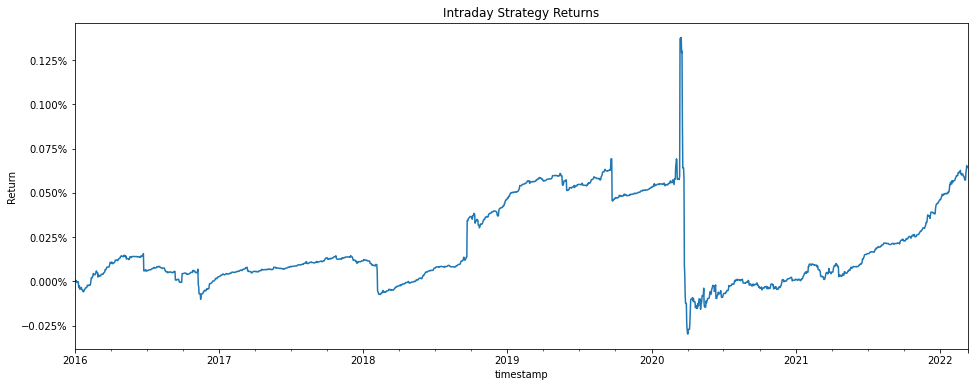

In [39]:
strategy_cum_return.plot(figsize=(16, 6))

plt.title('Intraday Strategy Returns')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()